In [1]:
# https://www.youtube.com/watch?v=A9c7hGXQ5A8&list=PLeo1K3hjS3uvMADnFjV1yg6E5nVU4kOob&index=2

# Sources
# https://finance.yahoo.com/quote/SGGDX/history?p=SGGDX
# https://finance.yahoo.com/quote/GLD/history?p=GLD
# https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC



In [26]:
import pandas as pd

df = pd.read_csv("GLD-no-dates.csv")
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
0,120.349998,120.500000,120.190002,120.239998,120.239998,3741800
1,120.820000,121.519997,120.769997,121.169998,121.169998,6054600
2,121.129997,121.309998,120.889999,121.300003,121.300003,2324700
3,120.800003,120.839996,120.459999,120.830002,120.830002,4303500
4,121.110001,121.260002,120.750000,120.870003,120.870003,4133200


In [7]:
# date_range generates dates  - if they're missing
rng = pd.date_range(start="2019-05-22", end="2020-05-22", freq='B') # business days
rng

DatetimeIndex(['2019-05-22', '2019-05-23', '2019-05-24', '2019-05-27',
               '2019-05-28', '2019-05-29', '2019-05-30', '2019-05-31',
               '2019-06-03', '2019-06-04',
               ...
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', length=263, freq='B')

In [10]:
df.set_index(rng, inplace=True) #will fail, need to exclude holidays


ValueError: Length mismatch: Expected 254 rows, received array of length 263

In [28]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
rng = pd.bdate_range(start="2019-05-22", end="2020-05-22", freq=us_bd) # business days
rng

DatetimeIndex(['2019-05-22', '2019-05-23', '2019-05-24', '2019-05-28',
               '2019-05-29', '2019-05-30', '2019-05-31', '2019-06-03',
               '2019-06-04', '2019-06-05',
               ...
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', length=253, freq='C')

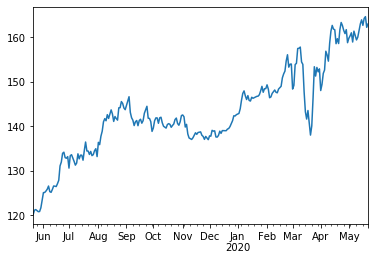

In [31]:
df.set_index(rng, inplace=True)

%matplotlib inline
df.Close.plot()

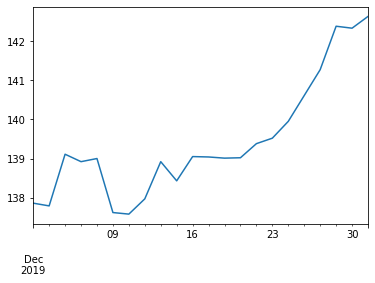

In [36]:
dec_df = df["2019-12-01": "2020-01-01"]
dec_df.Close.plot()

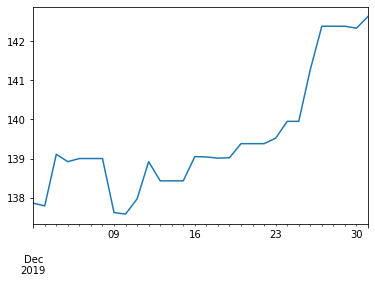

In [42]:
# replace non-trading days with previous days values
# important 
dec_df.asfreq('D', method='pad').Close.plot() # padding daily prices

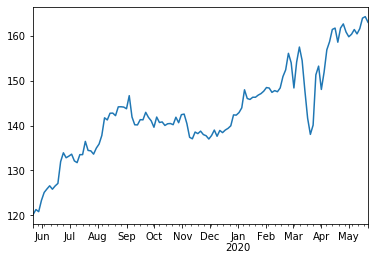

In [44]:
# possible to add multiplier: (every 3 days)
# https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

df.asfreq('3D', method='pad').Close.plot()

In [46]:
# if you know only start date, your range could include
# number of periods, 
rng = pd.date_range(start="2019-05-22", periods=253, freq=us_bd)
rng

DatetimeIndex(['2019-05-22', '2019-05-23', '2019-05-24', '2019-05-28',
               '2019-05-29', '2019-05-30', '2019-05-31', '2019-06-03',
               '2019-06-04', '2019-06-05',
               ...
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', length=253, freq='C')

In [51]:
# generate random numbers
import numpy as np
randarr = np.random.randint(1,10,len(rng))

# create time series
ts = pd.Series(randarr, index=rng)
ts

2019-05-22    3
2019-05-23    1
2019-05-24    6
2019-05-28    4
2019-05-29    6
             ..
2020-05-18    9
2020-05-19    9
2020-05-20    9
2020-05-21    7
2020-05-22    6
Freq: C, Length: 253, dtype: int64

In [63]:
# Handling holidays - more details
# Custom calendar
# Implement your own calendar class derived from AbstractHolidayCalendar 
# example to be cloned: USFederalHolidayCalendar
# CustomBusinessDay can customize weekends (FRI & SAT as in Egypt)

my_holidays = ["2019-03-31"]
my_ideal_week = CustomBusinessDay(weekmask="Tue Wed Thu", holidays=my_holidays)
rng = pd.date_range(start="2019-05-22", periods=1000, freq=my_ideal_week)
rng

DatetimeIndex(['2019-05-22', '2019-05-23', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-11', '2019-06-12',
               ...
               '2025-09-17', '2025-09-18', '2025-09-23', '2025-09-24',
               '2025-09-25', '2025-09-30', '2025-10-01', '2025-10-02',
               '2025-10-07', '2025-10-08'],
              dtype='datetime64[ns]', length=1000, freq='C')